In [56]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Import Loan Prediction Data

In [2]:
# reading the loan prediction data
data=pd.read_csv("D:\Analytics Vidhya\Deep Learning\Loan Prediction\Loan Prediction\Loan_Prediction_pre-processing\Loan Prediction pre-processing/loan_data.csv")

In [3]:
# looking at the first five rows of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Understanding Loan Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Basic Statistical information of Loan Dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Shape of the data
data.shape

(614, 13)

In [7]:
# Checking Missing value in dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Datatype of Variables
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# EDA on Loan Data

<AxesSubplot:xlabel='Gender', ylabel='count'>

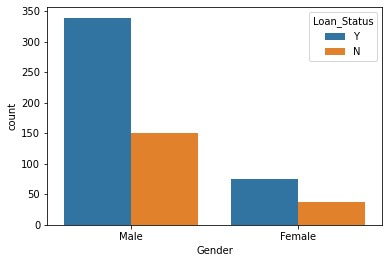

In [9]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

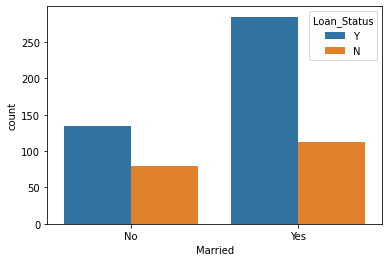

In [10]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

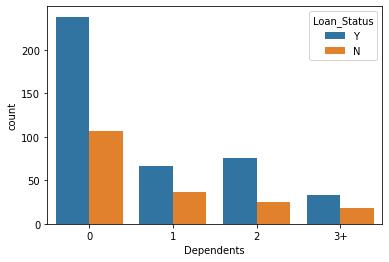

In [11]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

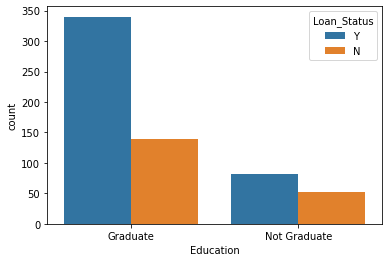

In [12]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

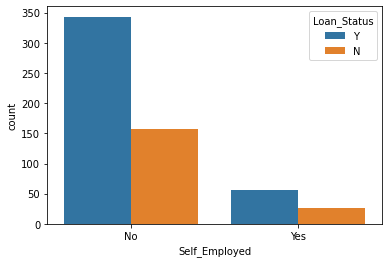

In [13]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

C:\Users\jatin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

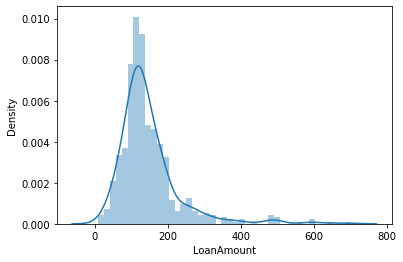

In [14]:
sns.distplot(data['LoanAmount'])

C:\Users\jatin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

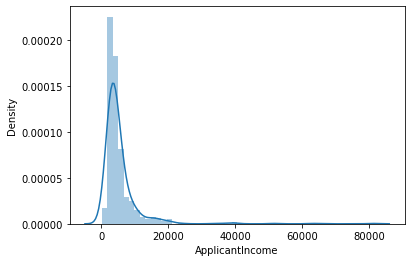

In [15]:
sns.distplot(data['ApplicantIncome'])

C:\Users\jatin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

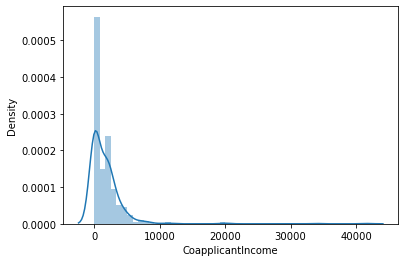

In [16]:
sns.distplot(data['CoapplicantIncome'])

C:\Users\jatin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

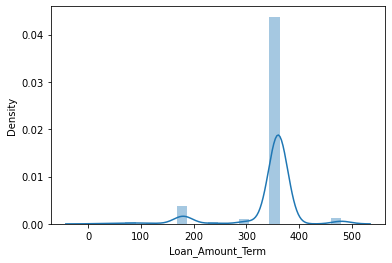

In [17]:
sns.distplot(data['Loan_Amount_Term'])

# Pre-processing Steps

<ol>1. Filling the missing values</ol>
<ol>2. Converting categories to numbers</ol>
<ol>3. Bring all the variables in range 0 to 1</ol>

## 1. Filling the missing values

### Categorical Data: Mode

In [18]:
# filling missing values of categorical variables with mode

data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

data['Married'].fillna(data['Married'].mode()[0],inplace=True)

data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

### Continuous Data: Mean

In [19]:
# filling missing values of continuous variables with mean

data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [20]:
# Checking Missing Value after imputation

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 2. Converting categories to numbers

In [21]:
# converting the categories into numbers using map function
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


## 3. Bringing all the variables in range 0 to 1


<img src='https://drive.google.com/uc?id=1Z7wN2BE8CDSYIJly5l0K9uqYdj9WUo3f'>

In [23]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0



# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [25]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [26]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [27]:
# Shape of Dataset

data.shape

(614, 12)

In [28]:
# Separating the independents and dependents variable

# Store all independent variables in X

x=data.drop('Loan_Status',axis=1)

# Store Dependent variable in y

y=data['Loan_Status']

In [29]:
# shape of independent and dependent variables
x.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

In [30]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [31]:
# shape of training and validation set
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3. Defining the architecture of the model

### a. Create a model

<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

In [32]:
# Importing Keras Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense 

In [33]:
# activation function of different layers

# for now I have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, I have used sigmoid activation function in the final layer

In [35]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(11,)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [36]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


## 4. Compiling the model (defining loss function, optimizer)

In [37]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 5. Training the model

In [38]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 2s 27ms/step - loss: 0.6316 - accuracy: 0.6904 - val_loss: 0.6168 - val_accuracy: 0.6911
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6126 - accuracy: 0.6864 - val_loss: 0.6049 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6013 - accuracy: 0.6864 - val_loss: 0.5949 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5915 - accuracy: 0.6864 - val_loss: 0.5879 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5846 - accuracy: 0.6864 - val_loss: 0.5816 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5784 - accuracy: 0.6864 - val_loss: 0.5760 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5726 - accuracy: 0.6864 - val_loss: 0.5697 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

## 6. Evaluating model performance on validation set

In [39]:
# getting predictions for the validation set
prediction = model.predict_classes(x_test)

C:\Users\jatin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.8130081300813008

### Visualizing the model performance

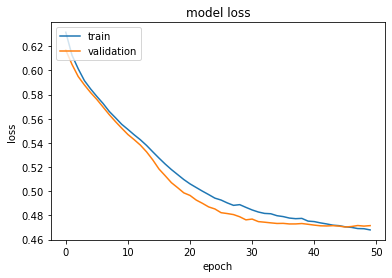

In [41]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

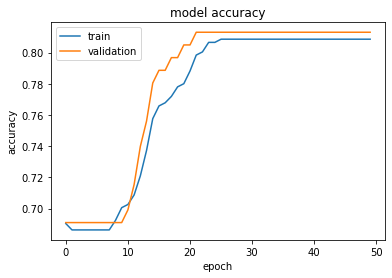

In [43]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Using Logistic Regression

In [44]:
lg=LogisticRegression()

In [45]:
lg.fit(x_train,y_train)

LogisticRegression()

In [46]:
lg_pred=lg.predict(x_test)

In [47]:
accuracy_score(y_test,lg_pred)

0.8130081300813008

In [59]:
print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.42      0.58        38
         1.0       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



## Using Decision Tree

In [48]:
dt=DecisionTreeClassifier()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
dt.pred=dt.predict(x_test)

In [52]:
accuracy_score(y_test,dt.pred)

0.7317073170731707

In [57]:
print(classification_report(y_test,dt.pred))

              precision    recall  f1-score   support

         0.0       0.57      0.55      0.56        38
         1.0       0.80      0.81      0.81        85

    accuracy                           0.73       123
   macro avg       0.68      0.68      0.68       123
weighted avg       0.73      0.73      0.73       123



In [60]:
gb=GradientBoostingClassifier()

In [61]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [62]:
gb_pred=gb.predict(x_test)

In [63]:
accuracy_score(y_test,gb_pred)

0.7886178861788617

In [65]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.42      0.55        38
         1.0       0.79      0.95      0.86        85

    accuracy                           0.79       123
   macro avg       0.79      0.69      0.71       123
weighted avg       0.79      0.79      0.77       123



In [66]:
rm=RandomForestClassifier()

In [67]:
rm.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
rm_pred=rm.predict(x_test)

In [69]:
accuracy_score(y_test,rm_pred)

0.7967479674796748

In [70]:
print(classification_report(y_test,rm_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.42      0.56        38
         1.0       0.79      0.96      0.87        85

    accuracy                           0.80       123
   macro avg       0.82      0.69      0.71       123
weighted avg       0.81      0.80      0.77       123

